In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.display.max_rows = 4000

In [2]:
# Read the dataset
df = pd.read_csv('data.csv')


In [3]:
# Data cleaning

# Change index to datetime to group by months and days
df['Date'] = pd.to_datetime(df['Date'])

# Using dt
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Convert T into celsius
df['Data_Value'] = 0.1* df['Data_Value']

# Remove feb 29 from data-set
df = df[  ~( (df['Month'] == 2) & (df['Day'] == 29) ) ]

# Sort by months and days
df = df.sort_values( by=['Month', 'Day'], ascending=True)

In [4]:
# Using data only upto 2015
df_tmax = df[ (df['Element'] == 'TMAX') & (df['Year']<2015)]
df_tmin = df[ (df['Element'] == 'TMIN') & (df['Year']<2015)]

df_tmax = df_tmax.set_index(['Month', 'Day'])
df_tmin = df_tmin.set_index(['Month', 'Day'])

df_tmax = df_tmax.groupby(['Month','Day']).max()
df_tmin = df_tmin.groupby(['Month','Day']).min()


In [5]:
# 2015 data
df_tmax15 = df[ (df['Element'] == 'TMAX') & (df['Year']==2015)]
df_tmin15 = df[ (df['Element'] == 'TMIN') & (df['Year']==2015)]

df_tmax15 = df_tmax15.set_index(['Month', 'Day'])
df_tmin15 = df_tmin15.set_index(['Month', 'Day'])

df_tmax15 = df_tmax15.groupby(['Month','Day']).max()
df_tmin15 = df_tmin15.groupby(['Month','Day']).min()


In [6]:
# Extract data for plotting
ymax = []
ymin = []

ymax15 = []
ymin15 = []

for i in range(len(df_tmax['Date'])):
#     print(i)
    ymax.append( [ df_tmax['Date'].dt.dayofyear.values[i], df_tmax['Data_Value'].values[i] ])
    ymin.append( [ df_tmin['Date'].dt.dayofyear.values[i], df_tmin['Data_Value'].values[i] ])
    
    # If record is broken in 2015
    if df_tmax15['Data_Value'].values[i] > df_tmax['Data_Value'].values[i] :
        ymax15.append( [ df_tmax15['Date'].dt.dayofyear.values[i], df_tmax15['Data_Value'].values[i] ])
        
    if df_tmin15['Data_Value'].values[i] < df_tmin['Data_Value'].values[i] :
        ymin15.append( [ df_tmin15['Date'].dt.dayofyear.values[i], df_tmin15['Data_Value'].values[i] ])

ymax = np.array(ymax)
ymin = np.array(ymin)

ymax15 = np.array(ymax15)
ymin15 = np.array(ymin15)

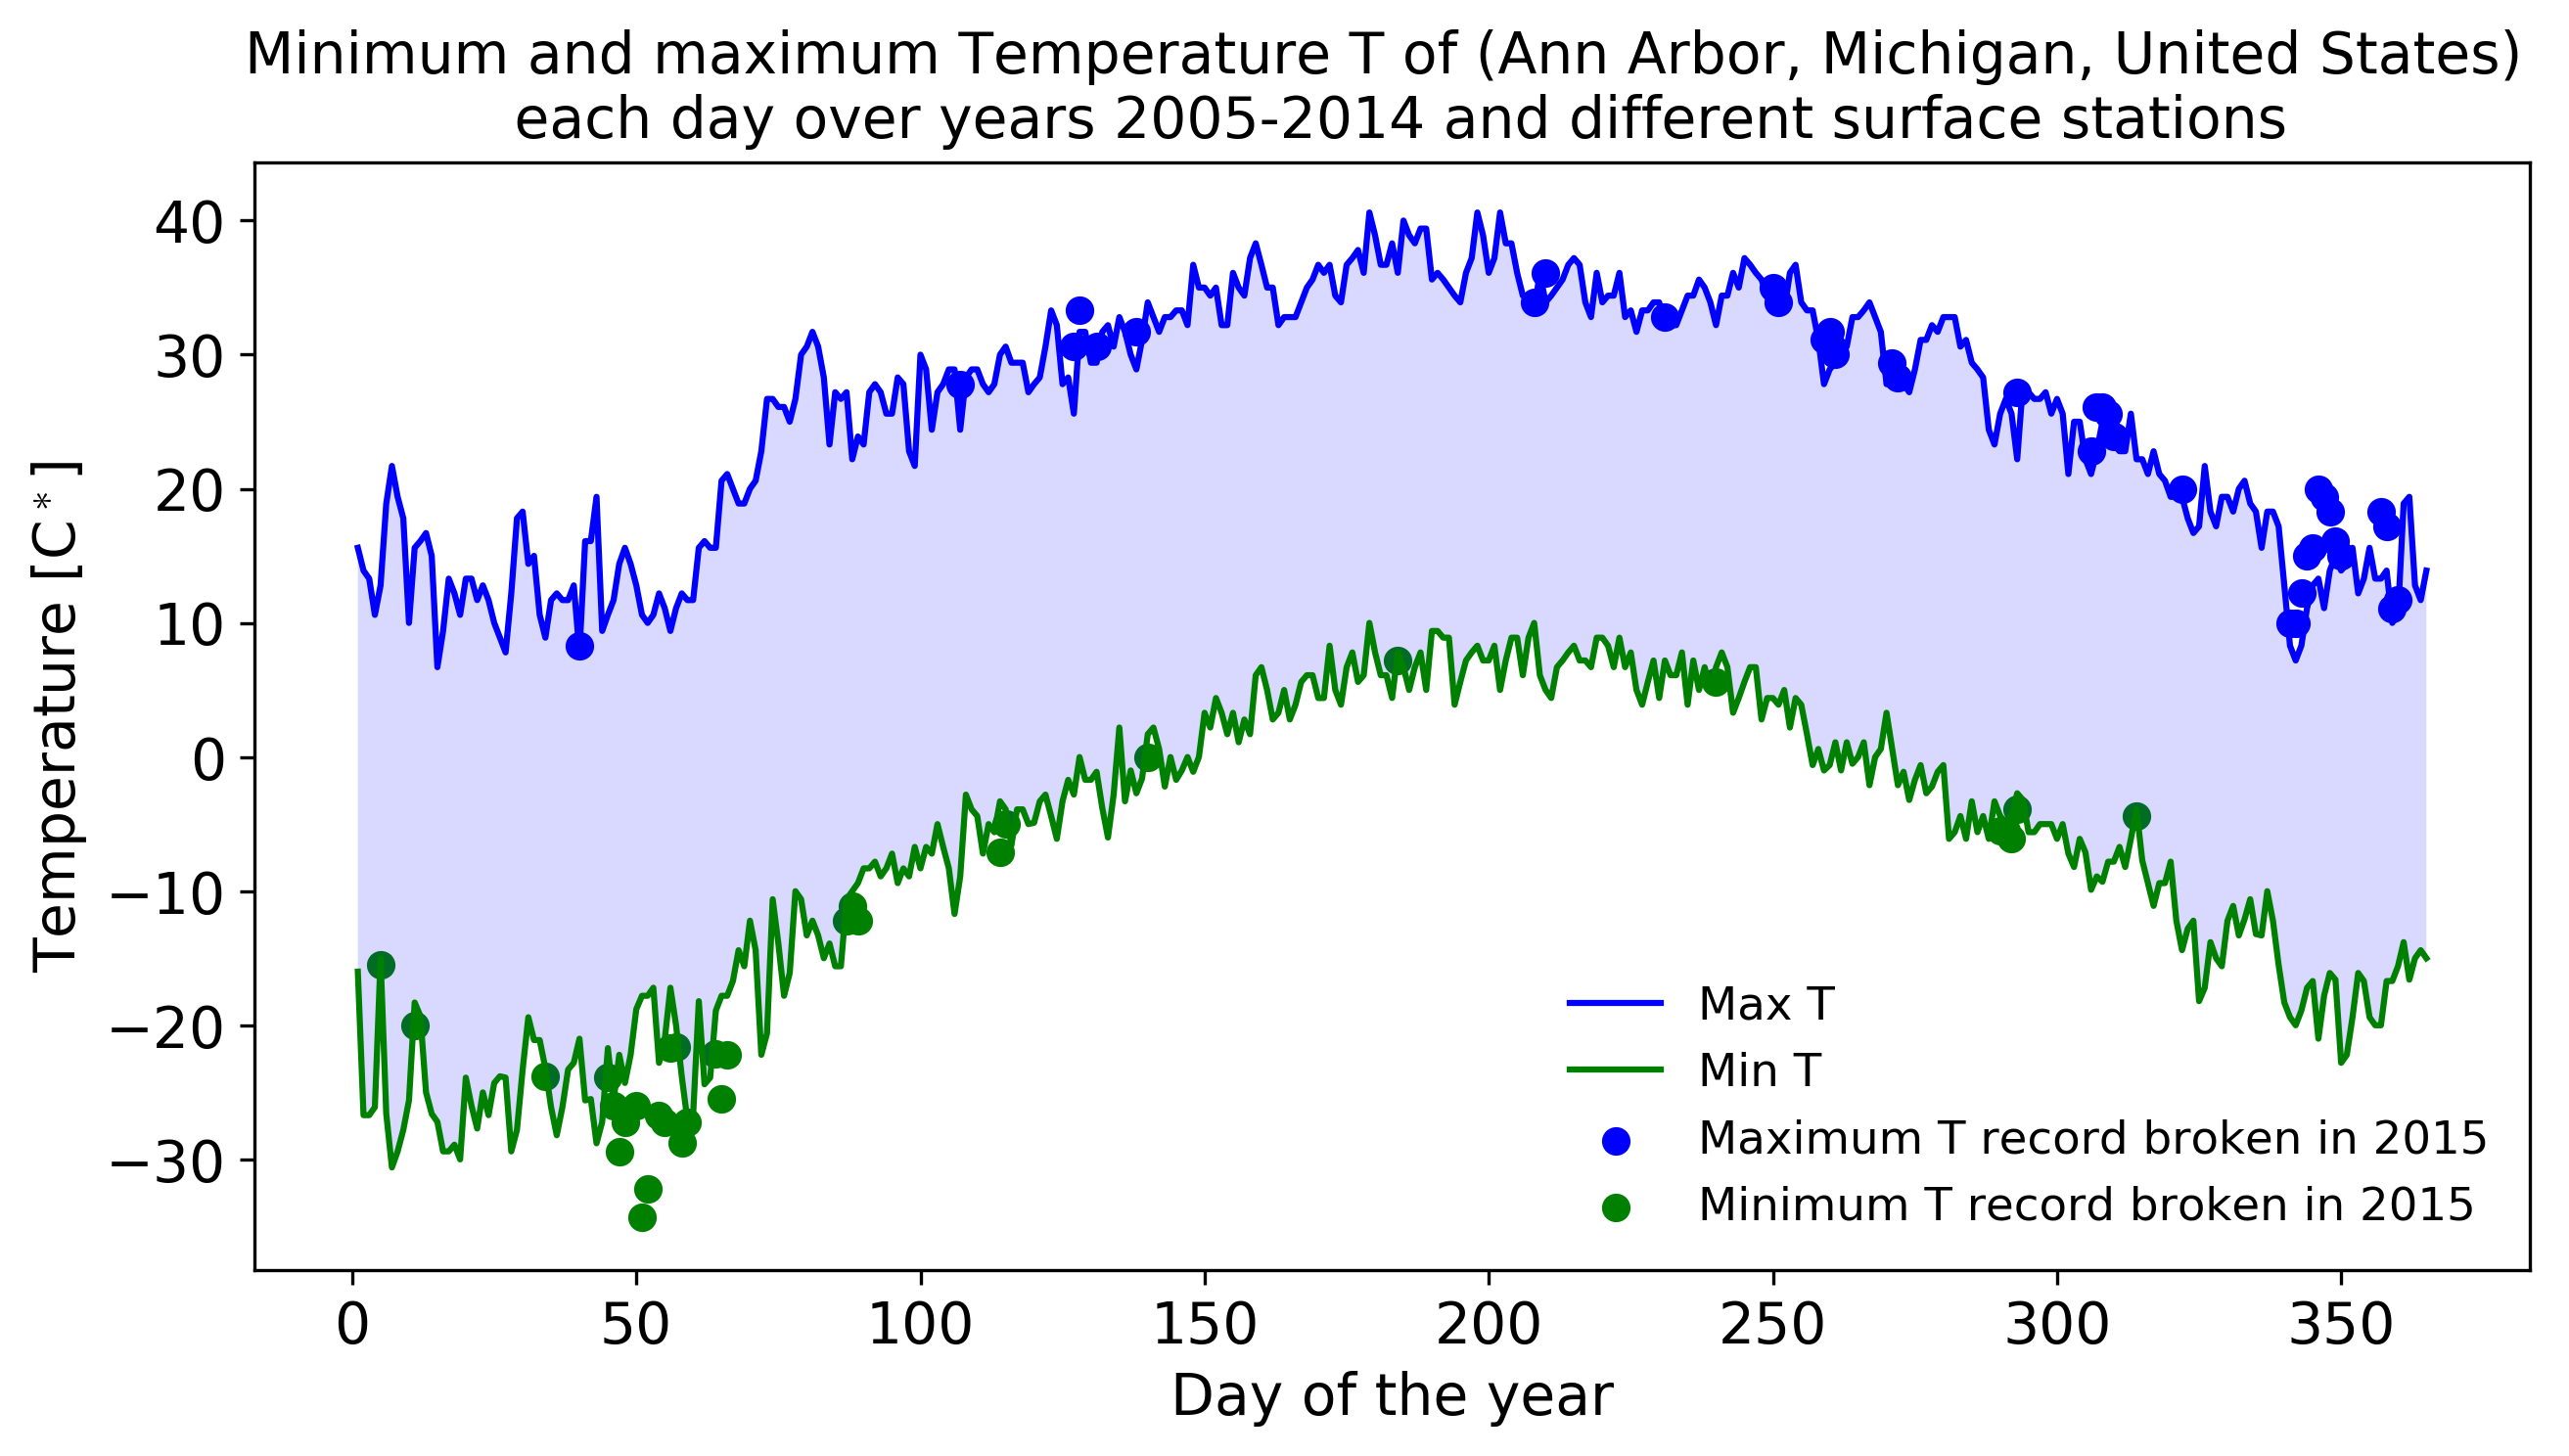

In [7]:
# Plot
fig, ax = plt.subplots(1,1, figsize = (10,5), dpi=300)
fontl=14

ax.plot(ymax[:,0],ymax[:,1], '-',color='b', label='Max T')
ax.plot(ymin[:,0],ymin[:,1], '-',color='g', label='Min T')

ax.scatter(ymax15[:,0],ymax15[:,1], color='b', label='Maximum T record broken in 2015')
ax.scatter(ymin15[:,0],ymin15[:,1], color='g', label='Minimum T record broken in 2015')

ax.legend(loc='lower right', fontsize=0.8*fontl, frameon=False)

ax.set_xlabel('Day of the year', fontsize=fontl)
ax.set_ylabel('Temperature [C$^*$]', fontsize=fontl)
ax.set_title('Minimum and maximum Temperature T of (Ann Arbor, Michigan, United States) \n each day over years 2005-2014 and different surface stations', fontsize=fontl)
# x = plt.gca().xaxis

# Ticks font size
ax.tick_params( labelsize=1.0*fontl)

# Shaded region.
fig.gca().fill_between(ymax[:,0],ymax[:,1], ymin[:,1],facecolor='blue', alpha=0.15)

fig.savefig('plot.jpg', bbox_inches='tight')